In [43]:
#Importing most of the libraries we have used in our assignments that we will use in this project

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv("./data.csv")
df[0::10]

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
10,0,0.482475,0.567543,0.538198,0.614026,0.614026,0.998978,0.797535,0.809460,0.303759,...,0.814111,0.076972,0.623687,0.614021,0.841337,0.278356,0.026971,0.565892,1,0.036572
20,0,0.485253,0.545573,0.534665,0.622177,0.622256,0.999065,0.797522,0.809406,0.303554,...,0.804639,0.014039,0.623922,0.622177,0.840639,0.277988,0.026794,0.565171,1,0.039507
30,1,0.462195,0.536034,0.514428,0.599987,0.599987,0.998909,0.797291,0.809223,0.303477,...,0.787082,0.001631,0.621876,0.599984,0.838259,0.297038,0.024886,0.576473,1,0.014562
40,0,0.507824,0.571631,0.549226,0.625326,0.625326,0.999136,0.797542,0.809413,0.303442,...,0.815731,0.007173,0.623729,0.625327,0.841574,0.279236,0.026908,0.565659,1,0.031485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6770,0,0.435967,0.498692,0.486054,0.603626,0.603626,0.998893,0.797239,0.809179,0.303421,...,0.773759,0.001563,0.623994,0.603624,0.838736,0.276539,0.026787,0.565138,1,0.062338
6780,0,0.520402,0.586295,0.567910,0.610545,0.610343,0.999095,0.797565,0.809454,0.303567,...,0.827839,0.003365,0.624445,0.610541,0.841969,0.276784,0.026791,0.565160,1,0.056275
6790,0,0.474333,0.530637,0.524653,0.599281,0.599353,0.998958,0.797356,0.809287,0.303489,...,0.791776,0.000581,0.622525,0.599277,0.839482,0.287351,0.025696,0.707735,1,0.017872
6800,0,0.438210,0.493295,0.484769,0.619762,0.619784,0.998926,0.797223,0.809153,0.303323,...,0.772423,0.000526,0.623801,0.619757,0.838684,0.276378,0.026774,0.565077,1,0.067287


# Data Analysis

# Check if our data has duplicate data

In [45]:
df.duplicated(keep=False).sum()

0

# Check if our data has any null values

In [46]:
df.isnull().values.sum()

0

# The data consist of only int64 and float64 data types

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [48]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [49]:
#feature columns
X = df.drop('Bankrupt?', axis=1)

#label column
y = df['Bankrupt?']

# The data is imbalanced and needs to balanced

0    6599
1     220
Name: Bankrupt?, dtype: int64


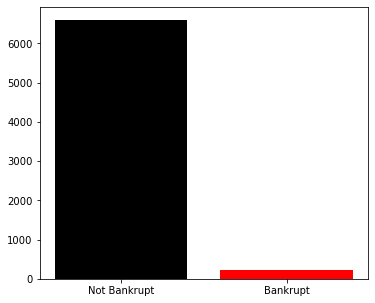

In [50]:
#we have inbalanced data
print(df['Bankrupt?'].value_counts())

no = df['Bankrupt?'].value_counts()[0]
yes = df['Bankrupt?'].value_counts()[1]


names = ['Not Bankrupt','Bankrupt']
values = [no,yes]
plt.figure(figsize=(20, 5))

plt.subplot(131)
plt.bar(names, values, color=['black','red'])
plt.show()

# We use SMOTE(Synthetic Minority Oversampling Technique) to correct the imbalance of our data.

In [51]:
#pip install -U imbalanced-learn

# transform the dataset using smote oversampling
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

1    6599
0    6599
Name: Bankrupt?, dtype: int64


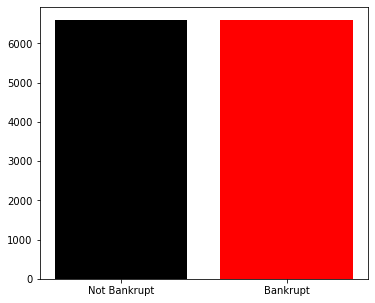

In [52]:
print(y.value_counts())

yes = y.value_counts()[0]
no = y.value_counts()[1]


names = ['Not Bankrupt','Bankrupt']
values = [no,yes]
plt.figure(figsize=(20, 5))

plt.subplot(131)
plt.bar(names, values, color=['black','red'])
plt.show()

# Split our data into training and testing variables

In [53]:
# Randomly splitting the original dataset into training set and testing set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=2)

# print the size of the traning set:
print(X_train.shape)
print(y_train.shape)

# print the size of the testing set:
print(X_test.shape)
print(y_test.shape)

(9238, 95)
(9238,)
(3960, 95)
(3960,)


# KNN

In [54]:
# Instantiating another "object" of KNeighborsClassifier "class" with k=3:
k = 3
bankrupt_knn = KNeighborsClassifier(n_neighbors=k)

# Training ONLY on the training set:
bankrupt_knn.fit(X_train, y_train)

# Testing on the testing set:
y_predict_knn = bankrupt_knn.predict(X_test)

In [55]:
# Accuracy Evaluation
accuracy_knn = accuracy_score(y_test, y_predict_knn)
print(accuracy_knn)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_knn = bankrupt_knn.predict_proba(X_test)

0.9143939393939394


In [56]:
# This line prints the "actual label" of the testing set:
print(y_test)

# This line prints the "predicted label" for the testing set:
print(y_predict_knn)

# This line prints the "estimated likelihood of both label" for the testing set:
print(y_predict_prob_knn)

# This line prints the "estimated likelihood of label=1" for the testing set:
print(y_predict_prob_knn[:,1])

6103     0
8930     1
495      0
4814     0
4060     0
        ..
5533     0
1599     0
12951    1
3345     0
12439    1
Name: Bankrupt?, Length: 3960, dtype: int64
[0 1 0 ... 1 0 1]
[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]
[0. 1. 0. ... 1. 0. 1.]


In [57]:
fpr_KNN, tpr_KNN, thresholds_KNN = metrics.roc_curve(y_test, y_predict_prob_knn[:,1], pos_label=1)

print(fpr_KNN)
print(tpr_KNN)

# AUC:
AUC = metrics.auc(fpr_KNN, tpr_KNN)
print(AUC)

[0.         0.06703352 0.14907454 0.20810405 1.        ]
[0.         0.93115757 0.9790923  0.99643039 1.        ]
0.9583584500052167


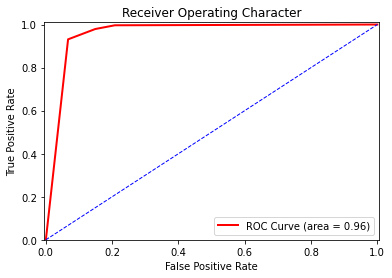

In [58]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr_KNN, tpr_KNN, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Character')
plt.legend(loc="lower right")

plt.show()

# Logistic Regression Classifier:

In [137]:
# "my_logreg" is instantiated as an "object" of LogisticRegression "class". 

bankrupt_logreg = LogisticRegression(max_iter=2000)

# Training ONLY on the training set:
bankrupt_logreg.fit(X_train, y_train)

# Testing on the testing set:
y_predict_logreg = bankrupt_logreg.predict(X_test)

In [138]:
# Accuracy Evaluation
accuracy = accuracy_score(y_test, y_predict_logreg)
print(accuracy)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_lr = bankrupt_logreg.predict_proba(X_test)

0.5972222222222222


In [139]:
# Likelihood Overview
print(y_test)

print(y_predict_logreg)

# "estimated likelihood of both label" for the testing set:
print(y_predict_prob_lr)

# "estimated likelihood of label=1" for the testing set:
print(y_predict_prob_lr[:,1])

6103     0
8930     1
495      0
4814     0
4060     0
        ..
5533     0
1599     0
12951    1
3345     0
12439    1
Name: Bankrupt?, Length: 3960, dtype: int64
[0 1 0 ... 0 0 0]
[[0.59981978 0.40018022]
 [0.49686124 0.50313876]
 [0.51052771 0.48947229]
 ...
 [0.59433468 0.40566532]
 [0.58277263 0.41722737]
 [0.60527514 0.39472486]]
[0.40018022 0.50313876 0.48947229 ... 0.40566532 0.41722737 0.39472486]


In [142]:
fpr_logistic, tpr_logistic, threshold_logistic = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label=1)

print(fpr_logistic)
print(tpr_logistic)

# AUC:
AUC_logistic = metrics.auc(fpr_logistic, tpr_logistic)
print(AUC_logistic)

[0.         0.         0.         ... 0.97748874 0.993997   1.        ]
[0.         0.01325854 0.01376849 ... 1.         1.         1.        ]
0.6484909971558956


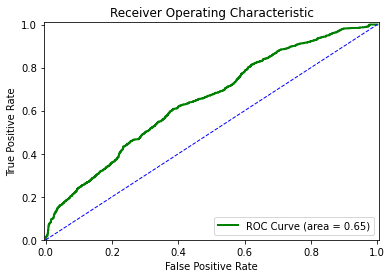

In [143]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr_logistic, tpr_logistic, color='green', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC_logistic)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()

# Random  Forest Classifier:

In [144]:
bankrupt_RandomForest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=3)

# Training ONLY on the training set:
bankrupt_RandomForest.fit(X_train, y_train)

# Testing on the testing set:
y_predict_randomforest = bankrupt_RandomForest.predict(X_test)

In [145]:
# Accuracy Evaluation
accuracy_randomforest = accuracy_score(y_test, y_predict_randomforest)
print(accuracy_randomforest)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_rf = bankrupt_RandomForest.predict_proba(X_test)

0.9755050505050505


In [146]:
# Likelihood Overview
print(y_test)

print(y_predict_randomforest)

# "estimated likelihood of both label" for the testing set:
print(y_predict_prob_rf)

# "estimated likelihood of label=1" for the testing set:
print(y_predict_prob_rf[:,1])

6103     0
8930     1
495      0
4814     0
4060     0
        ..
5533     0
1599     0
12951    1
3345     0
12439    1
Name: Bankrupt?, Length: 3960, dtype: int64
[0 1 0 ... 1 1 1]
[[0.94736842 0.05263158]
 [0.05263158 0.94736842]
 [1.         0.        ]
 ...
 [0.31578947 0.68421053]
 [0.47368421 0.52631579]
 [0.15789474 0.84210526]]
[0.05263158 0.94736842 0.         ... 0.68421053 0.52631579 0.84210526]


In [147]:
fpr_random, tpr_random, thresholds_random = metrics.roc_curve(y_test, y_predict_prob_rf[:,1], pos_label=1)

print(fpr_random)
print(tpr_random)

# AUC:
AUC_random = metrics.auc(fpr_random, tpr_random)
print(AUC_random)

[0.00000000e+00 5.00250125e-04 1.50075038e-03 4.00200100e-03
 6.00300150e-03 1.25062531e-02 1.60080040e-02 2.00100050e-02
 2.25112556e-02 2.75137569e-02 3.80190095e-02 4.20210105e-02
 5.35267634e-02 6.25312656e-02 7.65382691e-02 1.03551776e-01
 1.34567284e-01 1.76088044e-01 2.34617309e-01 3.56178089e-01
 1.00000000e+00]
[0.         0.59663437 0.7863335  0.86231515 0.90770015 0.93166752
 0.95206527 0.96787353 0.97756247 0.98521163 0.98929118 0.99337073
 0.99694034 0.99847017 0.99898011 0.99898011 0.99898011 0.99949006
 1.         1.         1.        ]
0.9972546191504726


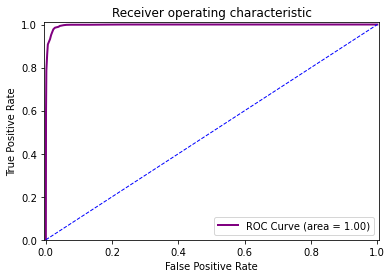

In [148]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr_random, tpr_random, color='purple', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC_random)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# SVM (Support Vector Machine)

In [69]:
svm = SVC(C=100, probability=True)
# Training ONLY on the training set:
svm.fit(X_train, y_train)

# Testing on the testing set:
y_predict_svm = svm.predict(X_test)

#find accuracy of svm
score_svm = accuracy_score(y_test, y_predict_svm)
print("Accuracy for SVM: %.2f%%" % (score_svm * 100.0))

Accuracy for SVM: 90.08%


In [70]:
#AUC

#Estimates the probability of each label
y_predict_prob_SVM = svm.predict_proba(X_test)

# calculate True Positive Rate (TPR) and False Positive Rate (FPR)
fpr_SVM,tpr_SVM,thresholds_SVM = metrics.roc_curve(y_test,y_predict_prob_SVM[:,1],pos_label=1)

# AUC:
AUC_SVM = metrics.auc(fpr_SVM, tpr_SVM)
print('AUC for SVM:', AUC_SVM)

AUC for SVM: 0.955673272638359


# Cross validation

In [71]:
scores_svm = cross_val_score(svm, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_svm.mean(), scores_svm.std() * 2))

Accuracy: 0.90 (+/- 0.04)


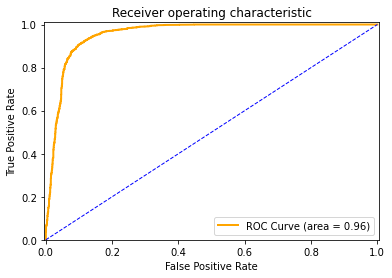

In [72]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr_SVM, tpr_SVM, color='orange', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC_SVM)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# XGBoost

In [73]:
# In the following line, "my_XGBoost" is instantiated as an "object" of XGBClassifier "class".
my_XGBoost = XGBClassifier()

my_XGBoost.fit(X_train, y_train)

#uses method predict of the trained object
y_predict_XGBoost = my_XGBoost.predict(X_test)

# Function "accuracy_score" returns percentage of correct predictions
score_XGBoost = accuracy_score(y_test, y_predict_XGBoost)

print("Accuracy for XGBoost: %.2f%%" % (score_XGBoost * 100.0))

Accuracy for XGBoost: 98.71%


In [74]:
#AUC

#Estimates the probability of each label
y_predict_prob_XGBoost = my_XGBoost.predict_proba(X_test)

# calculate True Positive Rate (TPR) and False Positive Rate (FPR)
fpr_XGBoost,tpr_XGBoost,thresholds_XGBoost = metrics.roc_curve(y_test,y_predict_prob_XGBoost[:,1],pos_label=1)

# AUC:
AUC_XGBoost = metrics.auc(fpr_XGBoost, tpr_XGBoost)
print('AUC for XGBoost:', AUC_XGBoost)

AUC for XGBoost: 0.9993487309692581


# Cross Validation

In [75]:
scores_xgb = cross_val_score(my_XGBoost, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_xgb.mean(), scores_xgb.std() * 2))

Accuracy: 0.98 (+/- 0.03)


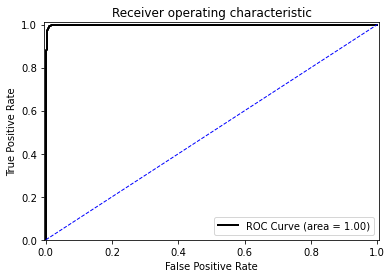

In [76]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr_XGBoost, tpr_XGBoost, color='black', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC_XGBoost)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# Feature importance in XGBoost model

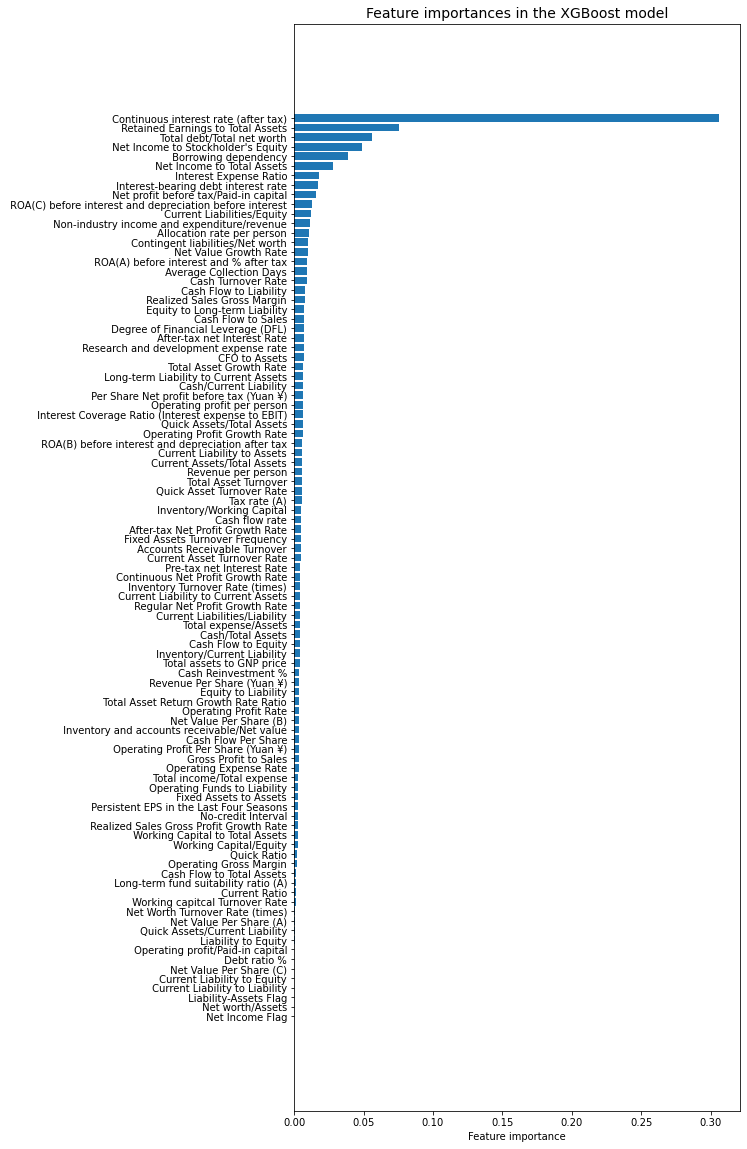

In [77]:
# Producing a dataframe of feature importances
ft_weights_xgb_reg = pd.DataFrame(my_XGBoost.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)

# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.1)

# XGBoost tree 

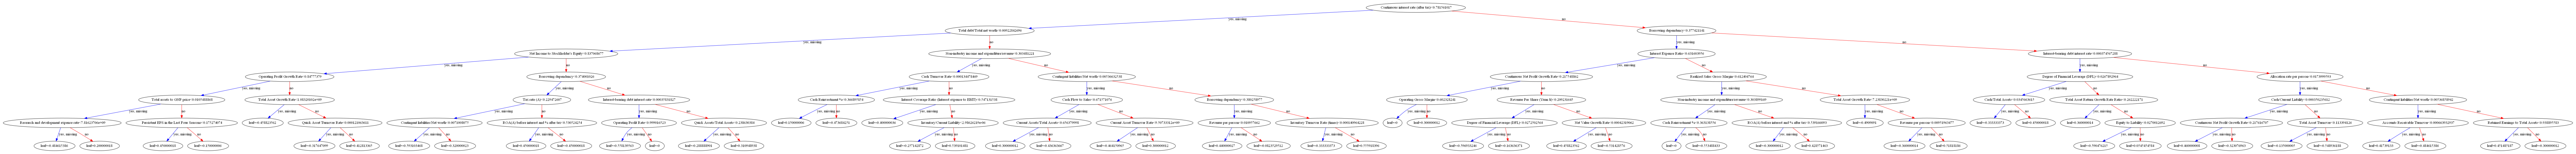

In [78]:
from xgboost import plot_tree
# plot single tree
plot_tree(my_XGBoost)
fig = plt.gcf()
fig.set_size_inches(150, 100)
fig.savefig('tree.png')
plt.show()

# ANN - Neural Network¶

# Before using breadth first search cv to find the best structure for an ANN with one hidden layer i will try myself to create different neurons with different number of neurons and test on the data set just to see what accuracy i get .¶


In [79]:
from sklearn.neural_network import MLPClassifier

#checking the datasets 
X_train[::]

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
7675,0.331081,0.379106,0.370909,0.603567,0.603545,0.998965,0.796510,0.808472,0.301997,0.780676,...,0.697322,0.011217,0.624165,0.603564,0.829048,0.285372,0.026758,0.564995,1,0.020081
782,0.521669,0.572285,0.564163,0.608145,0.608145,0.998995,0.797566,0.809441,0.303779,0.781717,...,0.814862,0.001283,0.623384,0.608144,0.842202,0.284532,0.026964,0.565867,1,0.020059
1742,0.509628,0.540994,0.550725,0.599483,0.599483,0.998962,0.797425,0.809340,0.303601,0.781547,...,0.800274,0.001241,0.623177,0.599478,0.840318,0.277313,0.027240,0.566661,1,0.047013
3401,0.489251,0.541485,0.541303,0.607165,0.607208,0.999016,0.797426,0.809340,0.303490,0.781633,...,0.800896,0.004114,0.623814,0.607165,0.840440,0.279708,0.027003,0.565999,1,0.029489
12963,0.392317,0.423572,0.436815,0.548605,0.548605,0.997688,0.795513,0.807550,0.302926,0.779900,...,0.721047,0.002295,0.623566,0.548603,0.830709,0.286503,0.026699,0.564595,1,0.018580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,0.468581,0.535816,0.519193,0.640316,0.640316,0.999384,0.797923,0.809678,0.303590,0.781968,...,0.798928,0.001703,0.624423,0.640316,0.840223,0.276905,0.026806,0.565227,1,0.053767
11798,0.471755,0.532183,0.524805,0.603378,0.603378,0.998981,0.797304,0.809234,0.303348,0.781531,...,0.790316,0.005795,0.621942,0.603379,0.839343,0.285801,0.025617,0.582290,1,0.018946
6637,0.479842,0.546718,0.531292,0.595937,0.595937,0.998947,0.797514,0.809422,0.303787,0.781698,...,0.804093,0.012426,0.622299,0.595935,0.840633,0.278555,0.027041,0.566121,1,0.035220
2575,0.518842,0.559802,0.560362,0.634500,0.634500,0.999020,0.797445,0.809352,0.303513,0.781613,...,0.806752,0.001237,0.623632,0.634495,0.841411,0.286340,0.027300,0.566796,1,0.018534


# ANN with 30 neurons , one hidden layer

In [80]:
# training an ann
# 1 Hidden Layer with 30 neurons and activation function relu:
my_ANN = MLPClassifier(hidden_layer_sizes=(30,), activation= 'relu', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.1, verbose=True, tol=0.0001)

In [81]:
my_ANN.fit(X_train, y_train)

Iteration 1, loss = 6.03732526
Iteration 2, loss = 1.21665183
Iteration 3, loss = 1.16490359
Iteration 4, loss = 1.15351347
Iteration 5, loss = 1.15731004
Iteration 6, loss = 1.14657954
Iteration 7, loss = 1.14197038
Iteration 8, loss = 1.13459203
Iteration 9, loss = 1.13790177
Iteration 10, loss = 1.15392604
Iteration 11, loss = 1.15361073
Iteration 12, loss = 1.14213530
Iteration 13, loss = 1.13815506
Iteration 14, loss = 1.13136585
Iteration 15, loss = 1.14693461
Iteration 16, loss = 1.12337641
Iteration 17, loss = 1.13878424
Iteration 18, loss = 1.14297258
Iteration 19, loss = 1.13484271
Iteration 20, loss = 1.13125840
Iteration 21, loss = 1.13136472
Iteration 22, loss = 1.11980910
Iteration 23, loss = 1.12361078
Iteration 24, loss = 1.12398188
Iteration 25, loss = 1.11231792
Iteration 26, loss = 1.11772434
Iteration 27, loss = 1.12464756
Iteration 28, loss = 1.11587068
Iteration 29, loss = 1.11311509
Iteration 30, loss = 1.11209838
Iteration 31, loss = 1.10829517
Iteration 32, los

MLPClassifier(alpha=1, hidden_layer_sizes=(30,), learning_rate_init=0.1,
              random_state=1, verbose=True)

In [82]:
#calculating accuracy 
y_predict_ann = my_ANN.predict(X_test)
score_ann = accuracy_score(y_test, y_predict_ann)
print('\n','accuracy: ',score_ann)


 accuracy:  0.509090909090909


In [83]:
#Trying 10 cv 
from sklearn.model_selection import cross_val_score

accuracy_list = cross_val_score(my_ANN, X, y, cv=10, scoring='accuracy')

Iteration 1, loss = 6.78263332
Iteration 2, loss = 1.30208268
Iteration 3, loss = 1.17084214
Iteration 4, loss = 1.10894955
Iteration 5, loss = 1.13394797
Iteration 6, loss = 1.10675370
Iteration 7, loss = 1.09081864
Iteration 8, loss = 1.08679167
Iteration 9, loss = 1.07751456
Iteration 10, loss = 1.04746347
Iteration 11, loss = 1.05694689
Iteration 12, loss = 1.04125982
Iteration 13, loss = 1.03231386
Iteration 14, loss = 1.03289338
Iteration 15, loss = 1.05765477
Iteration 16, loss = 1.11610046
Iteration 17, loss = 1.21683303
Iteration 18, loss = 1.22002103
Iteration 19, loss = 1.21935756
Iteration 20, loss = 1.22030255
Iteration 21, loss = 1.22007975
Iteration 22, loss = 1.21953046
Iteration 23, loss = 1.21945868
Iteration 24, loss = 1.22074397
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 5.53595580
Iteration 2, loss = 1.21519584
Iteration 3, loss = 1.16570613
Iteration 4, loss = 1.14486507
Iteration 5, loss = 1.14242

Iteration 5, loss = 1.03692752
Iteration 6, loss = 1.03682348
Iteration 7, loss = 1.03437712
Iteration 8, loss = 1.03674189
Iteration 9, loss = 1.02773331
Iteration 10, loss = 1.02773340
Iteration 11, loss = 1.02497806
Iteration 12, loss = 1.02465633
Iteration 13, loss = 1.02474878
Iteration 14, loss = 1.02489268
Iteration 15, loss = 1.02482996
Iteration 16, loss = 1.02487913
Iteration 17, loss = 1.02496059
Iteration 18, loss = 1.02529395
Iteration 19, loss = 1.02427442
Iteration 20, loss = 1.02575706
Iteration 21, loss = 1.02529494
Iteration 22, loss = 1.02494497
Iteration 23, loss = 1.02436720
Iteration 24, loss = 1.02591563
Iteration 25, loss = 1.02550567
Iteration 26, loss = 1.02508357
Iteration 27, loss = 1.02453142
Iteration 28, loss = 1.02568262
Iteration 29, loss = 1.02477497
Iteration 30, loss = 1.02444148
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 5.30913370
Iteration 2, loss = 1.08351812
Iteration 3, loss = 1

In [84]:
accuracy_cv = accuracy_list.mean()

print(accuracy_cv)

0.5081068072690514


# As we can see the accuracy of our neural network is really bad. There was a 2 percent increase when using CV . Lets try different hyper parameters for our ann .

# ANN with 50 neurons , one hidden layer , learning rate init = .01

In [85]:
#training an ann
# 1 Hidden Layer with 50 neurons and activation function relu:
my_ANN = MLPClassifier(hidden_layer_sizes=(50,), activation= 'relu', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.01, verbose=True, tol=0.0001)

my_ANN.fit(X_train, y_train)

Iteration 1, loss = 13.70085206
Iteration 2, loss = 11.51492160
Iteration 3, loss = 10.69978339
Iteration 4, loss = 10.45356647
Iteration 5, loss = 9.54229458
Iteration 6, loss = 9.09549651
Iteration 7, loss = 10.34680202
Iteration 8, loss = 9.90029176
Iteration 9, loss = 9.36184510
Iteration 10, loss = 8.30216962
Iteration 11, loss = 8.52829363
Iteration 12, loss = 8.64017148
Iteration 13, loss = 7.45251178
Iteration 14, loss = 8.14028905
Iteration 15, loss = 8.40700098
Iteration 16, loss = 7.41499587
Iteration 17, loss = 7.73244548
Iteration 18, loss = 8.62525455
Iteration 19, loss = 8.44550928
Iteration 20, loss = 8.05499750
Iteration 21, loss = 9.85218726
Iteration 22, loss = 8.30954005
Iteration 23, loss = 7.99195370
Iteration 24, loss = 8.09869438
Iteration 25, loss = 8.51056172
Iteration 26, loss = 7.61640103
Iteration 27, loss = 7.61585927
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(alpha=1, hidden_layer_sizes=(50,), learning_rate_init=0.01,
              random_state=1, verbose=True)

In [86]:
#calculating accuracy 
y_predict_ann = my_ANN.predict(X_test)
score_ann = accuracy_score(y_test, y_predict_ann)
print('\n','accuracy: ',score_ann)


 accuracy:  0.7871212121212121


# We see an increase in the accuracy from 50 to 70% , when we change the learning_rate_init to .01 and we increase the number of neurons to 50 .

In [87]:
#Trying 10 cv 
from sklearn.model_selection import cross_val_score

accuracy_list = cross_val_score(my_ANN, X, y, cv=10, scoring='accuracy')

Iteration 1, loss = 13.36753099
Iteration 2, loss = 10.82085295
Iteration 3, loss = 9.64649889
Iteration 4, loss = 9.55158183
Iteration 5, loss = 9.48332855
Iteration 6, loss = 8.59797545
Iteration 7, loss = 9.34983272
Iteration 8, loss = 8.80310825
Iteration 9, loss = 8.71643253
Iteration 10, loss = 7.67628517
Iteration 11, loss = 8.02115661
Iteration 12, loss = 7.79063639
Iteration 13, loss = 7.81181602
Iteration 14, loss = 7.77257959
Iteration 15, loss = 9.08328323
Iteration 16, loss = 8.10414336
Iteration 17, loss = 7.37014977
Iteration 18, loss = 7.70979509
Iteration 19, loss = 7.47753083
Iteration 20, loss = 7.83077461
Iteration 21, loss = 7.93923866
Iteration 22, loss = 8.31927686
Iteration 23, loss = 7.42753175
Iteration 24, loss = 7.87483182
Iteration 25, loss = 7.49422837
Iteration 26, loss = 7.53570093
Iteration 27, loss = 7.64855780
Iteration 28, loss = 7.42208628
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1

Iteration 21, loss = 7.72263296
Iteration 22, loss = 7.90529512
Iteration 23, loss = 8.84297045
Iteration 24, loss = 8.09293308
Iteration 25, loss = 8.34142624
Iteration 26, loss = 7.86405607
Iteration 27, loss = 7.99074500
Iteration 28, loss = 8.70066607
Iteration 29, loss = 8.04297649
Iteration 30, loss = 9.10013253
Iteration 31, loss = 8.28839898
Iteration 32, loss = 8.48038212
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.52572600
Iteration 2, loss = 11.59227473
Iteration 3, loss = 10.18680833
Iteration 4, loss = 9.72015826
Iteration 5, loss = 9.56779320
Iteration 6, loss = 9.29085694
Iteration 7, loss = 9.28117754
Iteration 8, loss = 9.37709632
Iteration 9, loss = 9.63001841
Iteration 10, loss = 9.81648781
Iteration 11, loss = 9.03563239
Iteration 12, loss = 8.24749186
Iteration 13, loss = 8.52733498
Iteration 14, loss = 8.60369364
Iteration 15, loss = 9.34743114
Iteration 16, loss = 8.76380411
Iteration 17, loss =

In [88]:
accuracy_cv = accuracy_list.mean()

print(accuracy_cv)

0.7324622648011578


# using 10 cross validation still gives us a score of 70 percent . 

# What happens if we keep increasing the number of neurons ?  # 

# ANN with 70 neurons , one hidden layer , learning rate init = .01 


In [89]:
#training an ann
# 1 Hidden Layer with 70 neurons and activation function relu:
my_ANN = MLPClassifier(hidden_layer_sizes=(70,), activation= 'relu', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.01, verbose=True, tol=0.0001)

my_ANN.fit(X_train, y_train)

Iteration 1, loss = 14.00417483
Iteration 2, loss = 11.41531447
Iteration 3, loss = 10.45561246
Iteration 4, loss = 9.88923354
Iteration 5, loss = 9.67662101
Iteration 6, loss = 8.85637582
Iteration 7, loss = 8.55557340
Iteration 8, loss = 8.18558158
Iteration 9, loss = 8.35398207
Iteration 10, loss = 9.11970641
Iteration 11, loss = 8.01847519
Iteration 12, loss = 8.91636825
Iteration 13, loss = 7.70179363
Iteration 14, loss = 7.50528417
Iteration 15, loss = 7.92253426
Iteration 16, loss = 7.97503732
Iteration 17, loss = 8.01336394
Iteration 18, loss = 7.69693234
Iteration 19, loss = 9.62433919
Iteration 20, loss = 8.10995925
Iteration 21, loss = 7.49645621
Iteration 22, loss = 7.27741665
Iteration 23, loss = 7.07591820
Iteration 24, loss = 7.78350706
Iteration 25, loss = 7.78447008
Iteration 26, loss = 7.54294963
Iteration 27, loss = 7.52006361
Iteration 28, loss = 7.19518314
Iteration 29, loss = 8.05296368
Iteration 30, loss = 6.89545654
Iteration 31, loss = 7.42940261
Iteration 32, 

MLPClassifier(alpha=1, hidden_layer_sizes=(70,), learning_rate_init=0.01,
              random_state=1, verbose=True)

In [90]:
#calculating accuracy 
y_predict_ann = my_ANN.predict(X_test)
score_ann = accuracy_score(y_test, y_predict_ann)
print('\n','accuracy: ',score_ann)


 accuracy:  0.7457070707070707


# Accuracy keeps increasing ^ . 

# ANN with 200 neurons , one hidden layer , learning rate init = .01 

In [91]:
my_ANN = MLPClassifier(hidden_layer_sizes=(200,), activation= 'relu', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.01, verbose=True, tol=0.0001)

my_ANN.fit(X_train, y_train)

Iteration 1, loss = 14.42225471
Iteration 2, loss = 11.33542403
Iteration 3, loss = 10.06818910
Iteration 4, loss = 9.20708849
Iteration 5, loss = 7.98804923
Iteration 6, loss = 7.84499186
Iteration 7, loss = 8.74554182
Iteration 8, loss = 8.15500446
Iteration 9, loss = 7.71135832
Iteration 10, loss = 8.05169238
Iteration 11, loss = 7.96262044
Iteration 12, loss = 7.04332814
Iteration 13, loss = 6.75255998
Iteration 14, loss = 8.34209424
Iteration 15, loss = 6.93234174
Iteration 16, loss = 6.89689357
Iteration 17, loss = 6.06695777
Iteration 18, loss = 6.58021452
Iteration 19, loss = 6.97819118
Iteration 20, loss = 6.60009680
Iteration 21, loss = 6.65869525
Iteration 22, loss = 8.02657004
Iteration 23, loss = 6.23283894
Iteration 24, loss = 6.27062067
Iteration 25, loss = 6.44722837
Iteration 26, loss = 5.82019979
Iteration 27, loss = 7.29602070
Iteration 28, loss = 7.38045616
Iteration 29, loss = 6.65790097
Iteration 30, loss = 6.72675094
Iteration 31, loss = 7.07471337
Iteration 32, 

MLPClassifier(alpha=1, hidden_layer_sizes=(200,), learning_rate_init=0.01,
              random_state=1, verbose=True)

In [92]:
#calculating accuracy 
y_predict_ann = my_ANN.predict(X_test)
score_ann = accuracy_score(y_test, y_predict_ann)
print('\n','accuracy: ',score_ann)


 accuracy:  0.8146464646464646


# at 200 neurons we see still an increase to 80% , but it seems to me there was a decrese between 100-200.

# ANN with 150 neurons , one hidden layer , learning rate init = .01  

In [93]:
my_ANN = MLPClassifier(hidden_layer_sizes=(150,), activation= 'relu', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.01, verbose=True, tol=0.0001)

my_ANN.fit(X_train, y_train)


#calculating accuracy 
y_predict_ann = my_ANN.predict(X_test)
score_ann = accuracy_score(y_test, y_predict_ann)
print('\n','accuracy: ',score_ann)

Iteration 1, loss = 13.58058173
Iteration 2, loss = 11.38558595
Iteration 3, loss = 10.55314404
Iteration 4, loss = 9.80006623
Iteration 5, loss = 9.95089829
Iteration 6, loss = 9.62398753
Iteration 7, loss = 9.60687332
Iteration 8, loss = 9.36202208
Iteration 9, loss = 9.28394547
Iteration 10, loss = 7.96746258
Iteration 11, loss = 6.58011268
Iteration 12, loss = 8.52195945
Iteration 13, loss = 7.03506471
Iteration 14, loss = 8.53049877
Iteration 15, loss = 7.82216191
Iteration 16, loss = 6.81075147
Iteration 17, loss = 8.23170442
Iteration 18, loss = 7.78364731
Iteration 19, loss = 7.03024003
Iteration 20, loss = 7.08707450
Iteration 21, loss = 7.42196444
Iteration 22, loss = 7.01804327
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.

 accuracy:  0.7982323232323232


# We see a decrease when the number of neurons is from 100-200 ^

# What happens if we use a different activation function ?  

In [94]:
my_ANN = MLPClassifier(hidden_layer_sizes=(70,), activation= 'tanh', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.01, verbose=True, tol=0.0001)

my_ANN.fit(X_train, y_train)


#calculating accuracy 
y_predict_ann = my_ANN.predict(X_test)
score_ann = accuracy_score(y_test, y_predict_ann)
print('\n','accuracy: ',score_ann)

Iteration 1, loss = 0.82372543
Iteration 2, loss = 0.79672541
Iteration 3, loss = 0.85425012
Iteration 4, loss = 0.81532963
Iteration 5, loss = 0.71583545
Iteration 6, loss = 0.70060589
Iteration 7, loss = 0.68062429
Iteration 8, loss = 0.66206069
Iteration 9, loss = 0.64669329
Iteration 10, loss = 0.62856353
Iteration 11, loss = 0.62040659
Iteration 12, loss = 0.61890096
Iteration 13, loss = 0.64235875
Iteration 14, loss = 0.66343242
Iteration 15, loss = 0.63931654
Iteration 16, loss = 0.64161846
Iteration 17, loss = 0.64731596
Iteration 18, loss = 0.64603457
Iteration 19, loss = 0.65316545
Iteration 20, loss = 0.63749617
Iteration 21, loss = 0.67024709
Iteration 22, loss = 0.66205525
Iteration 23, loss = 0.65338256
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.

 accuracy:  0.6457070707070707


In [95]:
my_ANN = MLPClassifier(hidden_layer_sizes=(70,), activation= 'logistic', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.01, verbose=True, tol=0.0001)

my_ANN.fit(X_train, y_train)


#calculating accuracy 
y_predict_ann = my_ANN.predict(X_test)
score_ann = accuracy_score(y_test, y_predict_ann)
print('\n','accuracy: ',score_ann)

Iteration 1, loss = 0.72085633
Iteration 2, loss = 0.71308333
Iteration 3, loss = 0.74771049
Iteration 4, loss = 0.79387710
Iteration 5, loss = 0.71039071
Iteration 6, loss = 0.68941653
Iteration 7, loss = 0.68563472
Iteration 8, loss = 0.68941376
Iteration 9, loss = 0.69569696
Iteration 10, loss = 0.68455686
Iteration 11, loss = 0.67206197
Iteration 12, loss = 0.65539996
Iteration 13, loss = 0.64861541
Iteration 14, loss = 0.65941507
Iteration 15, loss = 0.63174268
Iteration 16, loss = 0.63722606
Iteration 17, loss = 0.63311584
Iteration 18, loss = 0.63218742
Iteration 19, loss = 0.65262233
Iteration 20, loss = 0.64016256
Iteration 21, loss = 0.63137063
Iteration 22, loss = 0.62130305
Iteration 23, loss = 0.62801293
Iteration 24, loss = 0.65059916
Iteration 25, loss = 0.66955556
Iteration 26, loss = 0.67501544
Iteration 27, loss = 0.66559754
Iteration 28, loss = 0.65916303
Iteration 29, loss = 0.64935267
Iteration 30, loss = 0.65188006
Iteration 31, loss = 0.64192879
Iteration 32, los

# We see a low accuracy to our sweet spot # of neurons of 200 . This may be since we need an activation function that is for classifiers like in this case . We can keep using relu or try a new one like sigmoid. ^ 

# Based on the different neurons i tested , the one with 80 neurons and 200 neurons in one hidden layer , and learning rate 0.01 are the one that gives me best accuracy of about 80- 83% . 

# Now lets try to use GridSearchCV to find the best number of neurons 

In [96]:
seed = 1  
np.random.seed(seed)

In [97]:

from sklearn.model_selection import GridSearchCV

# define a range for the "number of neurons" in the hidden layer for a network with 1 hidden layer:
neuron_number = [(i,) for i in range(80,250,10)] #From my testing ive seen that we get the best results from 5-200 and then starts dying above 200

# create a dictionary for grid parameter:
param_grid = dict(hidden_layer_sizes = neuron_number)
print(param_grid,'\n')

# instantiate the model:
my_ANN = MLPClassifier(activation= 'relu', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.01, verbose=True, tol=0.0001)

# creat the grid, and define the metric for evaluating the model: 
grid = GridSearchCV(my_ANN, param_grid, cv=10, scoring='accuracy')

# fit the grid (start the grid search):
grid.fit(X, y)

# view the results:
#print(grid.cv_results_)



{'hidden_layer_sizes': [(80,), (90,), (100,), (110,), (120,), (130,), (140,), (150,), (160,), (170,), (180,), (190,), (200,), (210,), (220,), (230,), (240,)]} 

Iteration 1, loss = 13.85041943
Iteration 2, loss = 10.09753821
Iteration 3, loss = 8.82330251
Iteration 4, loss = 8.55010407
Iteration 5, loss = 9.28669029
Iteration 6, loss = 8.61262834
Iteration 7, loss = 8.32824636
Iteration 8, loss = 7.46005952
Iteration 9, loss = 7.42773309
Iteration 10, loss = 7.14435843
Iteration 11, loss = 7.92894246
Iteration 12, loss = 7.37987547
Iteration 13, loss = 6.81900709
Iteration 14, loss = 7.25822631
Iteration 15, loss = 6.65384667
Iteration 16, loss = 7.02608667
Iteration 17, loss = 7.31099691
Iteration 18, loss = 6.50077983
Iteration 19, loss = 7.06569437
Iteration 20, loss = 7.21417257
Iteration 21, loss = 6.94214822
Iteration 22, loss = 6.65196079
Iteration 23, loss = 8.13636061
Iteration 24, loss = 6.87191873
Iteration 25, loss = 6.42409791
Iteration 26, loss = 7.03498078
Iteration 27, 

Iteration 10, loss = 7.53170072
Iteration 11, loss = 7.54707149
Iteration 12, loss = 8.44978431
Iteration 13, loss = 7.23681993
Iteration 14, loss = 7.60927511
Iteration 15, loss = 7.39560067
Iteration 16, loss = 6.85349926
Iteration 17, loss = 7.13537735
Iteration 18, loss = 6.74491998
Iteration 19, loss = 7.53204583
Iteration 20, loss = 7.09910028
Iteration 21, loss = 7.50550936
Iteration 22, loss = 7.09589507
Iteration 23, loss = 6.77781044
Iteration 24, loss = 7.75404560
Iteration 25, loss = 7.49575794
Iteration 26, loss = 7.27025233
Iteration 27, loss = 6.95961713
Iteration 28, loss = 6.84017501
Iteration 29, loss = 7.88530633
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 14.00572579
Iteration 2, loss = 11.09539716
Iteration 3, loss = 9.86832354
Iteration 4, loss = 8.90181373
Iteration 5, loss = 9.38532106
Iteration 6, loss = 9.67896772
Iteration 7, loss = 8.31917777
Iteration 8, loss = 8.02401971
Iteration 9, loss = 

Iteration 21, loss = 7.62530351
Iteration 22, loss = 6.91877016
Iteration 23, loss = 7.10669494
Iteration 24, loss = 8.28667086
Iteration 25, loss = 7.56070183
Iteration 26, loss = 7.52711199
Iteration 27, loss = 7.87059054
Iteration 28, loss = 7.51686039
Iteration 29, loss = 8.07274153
Iteration 30, loss = 8.34890935
Iteration 31, loss = 8.04910023
Iteration 32, loss = 7.32147784
Iteration 33, loss = 7.87423649
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.82363426
Iteration 2, loss = 9.90109047
Iteration 3, loss = 10.58081371
Iteration 4, loss = 9.25588370
Iteration 5, loss = 9.78725932
Iteration 6, loss = 9.15976207
Iteration 7, loss = 8.64954817
Iteration 8, loss = 8.41492844
Iteration 9, loss = 8.68445185
Iteration 10, loss = 8.00205615
Iteration 11, loss = 8.16869960
Iteration 12, loss = 7.82034997
Iteration 13, loss = 8.92569902
Iteration 14, loss = 7.71099089
Iteration 15, loss = 8.21730810
Iteration 16, loss = 

Iteration 18, loss = 7.35959724
Iteration 19, loss = 7.20251188
Iteration 20, loss = 6.70045511
Iteration 21, loss = 6.82978667
Iteration 22, loss = 7.48124184
Iteration 23, loss = 7.17280380
Iteration 24, loss = 6.95747994
Iteration 25, loss = 6.70835595
Iteration 26, loss = 6.82690824
Iteration 27, loss = 7.07077326
Iteration 28, loss = 6.94836197
Iteration 29, loss = 7.08539676
Iteration 30, loss = 7.42210085
Iteration 31, loss = 7.17979826
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 14.14419747
Iteration 2, loss = 11.65548150
Iteration 3, loss = 10.41560106
Iteration 4, loss = 9.26319854
Iteration 5, loss = 9.35905267
Iteration 6, loss = 8.90849904
Iteration 7, loss = 7.85512901
Iteration 8, loss = 8.24543027
Iteration 9, loss = 8.20777355
Iteration 10, loss = 7.53980200
Iteration 11, loss = 8.23731412
Iteration 12, loss = 7.65212851
Iteration 13, loss = 7.68629904
Iteration 14, loss = 8.01233818
Iteration 15, loss =

Iteration 2, loss = 11.31654797
Iteration 3, loss = 9.82566322
Iteration 4, loss = 9.48362261
Iteration 5, loss = 9.00847619
Iteration 6, loss = 8.42326338
Iteration 7, loss = 9.52794362
Iteration 8, loss = 9.56227716
Iteration 9, loss = 7.84374514
Iteration 10, loss = 8.70527952
Iteration 11, loss = 7.63671506
Iteration 12, loss = 9.41982571
Iteration 13, loss = 7.82271103
Iteration 14, loss = 6.88833600
Iteration 15, loss = 7.67768340
Iteration 16, loss = 7.35381560
Iteration 17, loss = 7.08713637
Iteration 18, loss = 6.97563336
Iteration 19, loss = 7.01572841
Iteration 20, loss = 7.77195435
Iteration 21, loss = 8.12478474
Iteration 22, loss = 7.17730608
Iteration 23, loss = 7.21800124
Iteration 24, loss = 7.61921722
Iteration 25, loss = 8.10167539
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.86456673
Iteration 2, loss = 11.21592491
Iteration 3, loss = 10.78125777
Iteration 4, loss = 9.37807133
Iteration 5, loss = 9.

Iteration 6, loss = 9.31166901
Iteration 7, loss = 7.78119354
Iteration 8, loss = 8.54717307
Iteration 9, loss = 8.57488764
Iteration 10, loss = 8.07757990
Iteration 11, loss = 7.81869619
Iteration 12, loss = 7.43913410
Iteration 13, loss = 7.21736094
Iteration 14, loss = 7.37348421
Iteration 15, loss = 7.31820420
Iteration 16, loss = 7.27362154
Iteration 17, loss = 6.95892485
Iteration 18, loss = 7.78576507
Iteration 19, loss = 7.66956121
Iteration 20, loss = 8.29606360
Iteration 21, loss = 6.65201399
Iteration 22, loss = 6.73088123
Iteration 23, loss = 8.35632405
Iteration 24, loss = 7.52318091
Iteration 25, loss = 7.24221616
Iteration 26, loss = 7.28713391
Iteration 27, loss = 7.72310379
Iteration 28, loss = 7.31770609
Iteration 29, loss = 7.14634111
Iteration 30, loss = 6.82816601
Iteration 31, loss = 7.67610274
Iteration 32, loss = 7.43497971
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.88804579
Iteration 2, loss 

Iteration 22, loss = 7.34228909
Iteration 23, loss = 6.98659338
Iteration 24, loss = 6.76456720
Iteration 25, loss = 7.40220679
Iteration 26, loss = 7.52087860
Iteration 27, loss = 6.94795891
Iteration 28, loss = 7.07890677
Iteration 29, loss = 7.41498211
Iteration 30, loss = 7.67422174
Iteration 31, loss = 7.40902788
Iteration 32, loss = 6.83893991
Iteration 33, loss = 7.07289264
Iteration 34, loss = 7.38333720
Iteration 35, loss = 7.38787810
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.89418943
Iteration 2, loss = 11.11700136
Iteration 3, loss = 10.76214752
Iteration 4, loss = 9.26313481
Iteration 5, loss = 10.02201506
Iteration 6, loss = 8.19020968
Iteration 7, loss = 7.98937828
Iteration 8, loss = 8.20979666
Iteration 9, loss = 7.54363221
Iteration 10, loss = 7.70649723
Iteration 11, loss = 7.01773677
Iteration 12, loss = 7.71305460
Iteration 13, loss = 7.13931168
Iteration 14, loss = 7.51194066
Iteration 15, loss 

Iteration 18, loss = 7.18241340
Iteration 19, loss = 7.02915843
Iteration 20, loss = 7.17366569
Iteration 21, loss = 6.58640988
Iteration 22, loss = 6.42862327
Iteration 23, loss = 6.45363027
Iteration 24, loss = 6.85255591
Iteration 25, loss = 6.47398802
Iteration 26, loss = 6.53605761
Iteration 27, loss = 6.65849822
Iteration 28, loss = 7.06616535
Iteration 29, loss = 6.20261935
Iteration 30, loss = 6.65972097
Iteration 31, loss = 6.64376326
Iteration 32, loss = 7.18513586
Iteration 33, loss = 6.33815511
Iteration 34, loss = 6.75242189
Iteration 35, loss = 7.37932295
Iteration 36, loss = 6.93352336
Iteration 37, loss = 7.17845718
Iteration 38, loss = 7.01641740
Iteration 39, loss = 6.89113131
Iteration 40, loss = 7.08925696
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.76341530
Iteration 2, loss = 10.12275390
Iteration 3, loss = 10.31273821
Iteration 4, loss = 8.46715282
Iteration 5, loss = 7.96282093
Iteration 6, los

Iteration 21, loss = 7.10315692
Iteration 22, loss = 7.79506950
Iteration 23, loss = 6.89078259
Iteration 24, loss = 6.85869872
Iteration 25, loss = 7.01482788
Iteration 26, loss = 6.70625224
Iteration 27, loss = 7.41816912
Iteration 28, loss = 7.04786473
Iteration 29, loss = 6.96412021
Iteration 30, loss = 7.30164434
Iteration 31, loss = 6.86418882
Iteration 32, loss = 7.32133862
Iteration 33, loss = 7.25634452
Iteration 34, loss = 7.38327184
Iteration 35, loss = 7.63995237
Iteration 36, loss = 7.69817104
Iteration 37, loss = 7.64759984
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 14.49049671
Iteration 2, loss = 10.38321062
Iteration 3, loss = 9.97399035
Iteration 4, loss = 8.97390704
Iteration 5, loss = 8.54910817
Iteration 6, loss = 8.18664593
Iteration 7, loss = 7.69864097
Iteration 8, loss = 7.58786098
Iteration 9, loss = 8.74288362
Iteration 10, loss = 7.14385348
Iteration 11, loss = 7.71280525
Iteration 12, loss = 

Iteration 23, loss = 7.35562576
Iteration 24, loss = 7.15069609
Iteration 25, loss = 8.19192679
Iteration 26, loss = 6.89460787
Iteration 27, loss = 6.90098702
Iteration 28, loss = 6.59857786
Iteration 29, loss = 6.99467343
Iteration 30, loss = 7.54552595
Iteration 31, loss = 7.58590933
Iteration 32, loss = 7.32228160
Iteration 33, loss = 7.11411817
Iteration 34, loss = 7.19994469
Iteration 35, loss = 6.97489953
Iteration 36, loss = 6.50693725
Iteration 37, loss = 7.08309537
Iteration 38, loss = 7.24319175
Iteration 39, loss = 6.97802049
Iteration 40, loss = 7.29473836
Iteration 41, loss = 7.03766263
Iteration 42, loss = 6.97018122
Iteration 43, loss = 7.03857555
Iteration 44, loss = 7.15226108
Iteration 45, loss = 7.06221051
Iteration 46, loss = 6.97045834
Iteration 47, loss = 7.14128273
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.96545158
Iteration 2, loss = 11.73054314
Iteration 3, loss = 9.43995165
Iteration 4, lo

Iteration 4, loss = 9.30075974
Iteration 5, loss = 9.15160838
Iteration 6, loss = 8.69414874
Iteration 7, loss = 7.48562169
Iteration 8, loss = 7.45423101
Iteration 9, loss = 8.22316320
Iteration 10, loss = 7.77188827
Iteration 11, loss = 7.18003517
Iteration 12, loss = 7.20558454
Iteration 13, loss = 7.80002235
Iteration 14, loss = 7.34320968
Iteration 15, loss = 7.22053124
Iteration 16, loss = 7.02003800
Iteration 17, loss = 6.70331592
Iteration 18, loss = 6.91424921
Iteration 19, loss = 6.86551989
Iteration 20, loss = 6.86681934
Iteration 21, loss = 7.03180100
Iteration 22, loss = 7.19079109
Iteration 23, loss = 6.99003053
Iteration 24, loss = 6.81817543
Iteration 25, loss = 7.46320366
Iteration 26, loss = 8.00788057
Iteration 27, loss = 6.99184687
Iteration 28, loss = 7.25451184
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.74061130
Iteration 2, loss = 10.23603971
Iteration 3, loss = 10.34561737
Iteration 4, loss = 

Iteration 8, loss = 7.78985578
Iteration 9, loss = 7.95752386
Iteration 10, loss = 8.10428416
Iteration 11, loss = 9.33705600
Iteration 12, loss = 7.50798263
Iteration 13, loss = 7.83293685
Iteration 14, loss = 7.59151539
Iteration 15, loss = 7.56902369
Iteration 16, loss = 6.70179141
Iteration 17, loss = 6.55198921
Iteration 18, loss = 6.49344215
Iteration 19, loss = 7.11020510
Iteration 20, loss = 6.99395306
Iteration 21, loss = 6.49946783
Iteration 22, loss = 7.51681746
Iteration 23, loss = 7.79903806
Iteration 24, loss = 7.03576119
Iteration 25, loss = 6.81958974
Iteration 26, loss = 7.55627143
Iteration 27, loss = 6.89094167
Iteration 28, loss = 6.99180775
Iteration 29, loss = 6.72682307
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.25856934
Iteration 2, loss = 10.10176585
Iteration 3, loss = 8.88498679
Iteration 4, loss = 7.90885466
Iteration 5, loss = 8.30026879
Iteration 6, loss = 7.36324343
Iteration 7, loss = 

Iteration 2, loss = 10.39338244
Iteration 3, loss = 10.39355448
Iteration 4, loss = 8.55912171
Iteration 5, loss = 8.49494374
Iteration 6, loss = 8.42993165
Iteration 7, loss = 8.02435457
Iteration 8, loss = 9.16989632
Iteration 9, loss = 7.88649399
Iteration 10, loss = 7.59557989
Iteration 11, loss = 7.78044057
Iteration 12, loss = 7.74256264
Iteration 13, loss = 7.76515171
Iteration 14, loss = 7.45121469
Iteration 15, loss = 7.46838129
Iteration 16, loss = 7.05415020
Iteration 17, loss = 6.97000217
Iteration 18, loss = 6.84108554
Iteration 19, loss = 7.17676735
Iteration 20, loss = 6.25356321
Iteration 21, loss = 7.41379313
Iteration 22, loss = 7.30568661
Iteration 23, loss = 7.12947474
Iteration 24, loss = 7.35113659
Iteration 25, loss = 7.95855067
Iteration 26, loss = 7.66220646
Iteration 27, loss = 6.77737805
Iteration 28, loss = 7.69273227
Iteration 29, loss = 7.37684711
Iteration 30, loss = 7.80085332
Iteration 31, loss = 7.64553536
Training loss did not improve more than tol=0.

Iteration 2, loss = 10.58343965
Iteration 3, loss = 10.04728279
Iteration 4, loss = 9.47860210
Iteration 5, loss = 8.80033585
Iteration 6, loss = 8.74243150
Iteration 7, loss = 8.95198778
Iteration 8, loss = 7.99125727
Iteration 9, loss = 8.38257817
Iteration 10, loss = 7.92065925
Iteration 11, loss = 7.59575885
Iteration 12, loss = 7.54751782
Iteration 13, loss = 7.33114335
Iteration 14, loss = 7.91438452
Iteration 15, loss = 7.81576291
Iteration 16, loss = 7.88473668
Iteration 17, loss = 7.35258128
Iteration 18, loss = 6.79548211
Iteration 19, loss = 7.70824690
Iteration 20, loss = 8.77683138
Iteration 21, loss = 7.58536773
Iteration 22, loss = 7.99577707
Iteration 23, loss = 7.45664305
Iteration 24, loss = 7.39457693
Iteration 25, loss = 7.45589227
Iteration 26, loss = 6.68911632
Iteration 27, loss = 7.19038155
Iteration 28, loss = 7.22584392
Iteration 29, loss = 7.49149541
Iteration 30, loss = 7.64503689
Iteration 31, loss = 6.74948075
Iteration 32, loss = 6.82128680
Iteration 33, 

Iteration 36, loss = 6.99193466
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.16663871
Iteration 2, loss = 10.65161331
Iteration 3, loss = 9.58933626
Iteration 4, loss = 9.57999089
Iteration 5, loss = 8.34049288
Iteration 6, loss = 8.30474810
Iteration 7, loss = 7.93822659
Iteration 8, loss = 7.93053399
Iteration 9, loss = 7.85521128
Iteration 10, loss = 6.84507851
Iteration 11, loss = 6.84579692
Iteration 12, loss = 7.12791622
Iteration 13, loss = 7.46062767
Iteration 14, loss = 7.09470757
Iteration 15, loss = 7.04632799
Iteration 16, loss = 6.87043739
Iteration 17, loss = 6.90499129
Iteration 18, loss = 8.23932856
Iteration 19, loss = 6.88263154
Iteration 20, loss = 6.22968823
Iteration 21, loss = 7.48999460
Iteration 22, loss = 6.96278313
Iteration 23, loss = 6.40736043
Iteration 24, loss = 7.10695500
Iteration 25, loss = 7.20407415
Iteration 26, loss = 7.45254896
Iteration 27, loss = 7.50481403
Iteration 28, loss = 

Iteration 15, loss = 7.26114540
Iteration 16, loss = 8.00644523
Iteration 17, loss = 7.06477318
Iteration 18, loss = 8.25921110
Iteration 19, loss = 7.31111328
Iteration 20, loss = 6.99013966
Iteration 21, loss = 7.75822943
Iteration 22, loss = 7.56005408
Iteration 23, loss = 7.47094535
Iteration 24, loss = 7.39355306
Iteration 25, loss = 7.34204329
Iteration 26, loss = 7.37110722
Iteration 27, loss = 7.28158819
Iteration 28, loss = 7.96291230
Iteration 29, loss = 6.99089969
Iteration 30, loss = 7.17962474
Iteration 31, loss = 7.56909134
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.81168169
Iteration 2, loss = 10.32115346
Iteration 3, loss = 9.16937114
Iteration 4, loss = 8.67565974
Iteration 5, loss = 8.18981782
Iteration 6, loss = 9.02830473
Iteration 7, loss = 7.62540212
Iteration 8, loss = 8.39869423
Iteration 9, loss = 7.78288154
Iteration 10, loss = 7.71927073
Iteration 11, loss = 6.64873441
Iteration 12, loss = 

Iteration 19, loss = 7.43420562
Iteration 20, loss = 7.42910854
Iteration 21, loss = 6.75910814
Iteration 22, loss = 7.69597405
Iteration 23, loss = 7.11202795
Iteration 24, loss = 6.47554977
Iteration 25, loss = 6.45741402
Iteration 26, loss = 6.35138383
Iteration 27, loss = 6.88975235
Iteration 28, loss = 6.72778723
Iteration 29, loss = 6.21747932
Iteration 30, loss = 6.91733029
Iteration 31, loss = 7.11965189
Iteration 32, loss = 6.57483619
Iteration 33, loss = 6.87394846
Iteration 34, loss = 7.29682501
Iteration 35, loss = 7.07118388
Iteration 36, loss = 7.03345053
Iteration 37, loss = 7.31654951
Iteration 38, loss = 6.03924534
Iteration 39, loss = 6.86242363
Iteration 40, loss = 7.08479002
Iteration 41, loss = 6.77983864
Iteration 42, loss = 7.08277970
Iteration 43, loss = 6.89612905
Iteration 44, loss = 6.96588112
Iteration 45, loss = 7.43264902
Iteration 46, loss = 7.43345797
Iteration 47, loss = 7.12549141
Iteration 48, loss = 6.62147857
Iteration 49, loss = 6.39370250
Training

Iteration 22, loss = 6.70258865
Iteration 23, loss = 7.18368358
Iteration 24, loss = 7.31120539
Iteration 25, loss = 6.68462561
Iteration 26, loss = 6.20424739
Iteration 27, loss = 6.60247501
Iteration 28, loss = 6.75539389
Iteration 29, loss = 6.66434463
Iteration 30, loss = 6.81221753
Iteration 31, loss = 6.64395002
Iteration 32, loss = 6.80664244
Iteration 33, loss = 6.63772568
Iteration 34, loss = 6.97536587
Iteration 35, loss = 6.57050470
Iteration 36, loss = 6.39306933
Iteration 37, loss = 6.61011821
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.34423876
Iteration 2, loss = 10.49291270
Iteration 3, loss = 9.44114654
Iteration 4, loss = 7.80831633
Iteration 5, loss = 9.13633233
Iteration 6, loss = 8.00536371
Iteration 7, loss = 7.66004285
Iteration 8, loss = 7.73438837
Iteration 9, loss = 7.69790705
Iteration 10, loss = 7.29067521
Iteration 11, loss = 6.99375817
Iteration 12, loss = 7.26031221
Iteration 13, loss = 

Iteration 30, loss = 6.75222253
Iteration 31, loss = 6.84410056
Iteration 32, loss = 7.50708827
Iteration 33, loss = 6.90302484
Iteration 34, loss = 7.10482517
Iteration 35, loss = 7.30855471
Iteration 36, loss = 7.10697847
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.96980492
Iteration 2, loss = 10.38639525
Iteration 3, loss = 9.32957950
Iteration 4, loss = 8.17057393
Iteration 5, loss = 7.97684008
Iteration 6, loss = 7.70331175
Iteration 7, loss = 7.98953731
Iteration 8, loss = 7.27424002
Iteration 9, loss = 7.00513283
Iteration 10, loss = 7.37759253
Iteration 11, loss = 7.06113037
Iteration 12, loss = 7.21048548
Iteration 13, loss = 6.79152253
Iteration 14, loss = 6.98979248
Iteration 15, loss = 6.69554766
Iteration 16, loss = 7.20787976
Iteration 17, loss = 7.37389828
Iteration 18, loss = 6.56053404
Iteration 19, loss = 6.51712351
Iteration 20, loss = 6.71499319
Iteration 21, loss = 6.57085741
Iteration 22, loss = 

Iteration 3, loss = 9.31780373
Iteration 4, loss = 9.40924952
Iteration 5, loss = 9.15849141
Iteration 6, loss = 7.29409712
Iteration 7, loss = 6.93410036
Iteration 8, loss = 6.94032912
Iteration 9, loss = 7.53405973
Iteration 10, loss = 7.48806779
Iteration 11, loss = 7.92403706
Iteration 12, loss = 7.20123397
Iteration 13, loss = 7.53526710
Iteration 14, loss = 7.20706056
Iteration 15, loss = 7.07322047
Iteration 16, loss = 6.63518471
Iteration 17, loss = 6.95964791
Iteration 18, loss = 6.99084245
Iteration 19, loss = 7.13635677
Iteration 20, loss = 7.12758575
Iteration 21, loss = 6.92346858
Iteration 22, loss = 6.65182017
Iteration 23, loss = 7.32443636
Iteration 24, loss = 6.82211503
Iteration 25, loss = 7.50819366
Iteration 26, loss = 6.93044993
Iteration 27, loss = 6.77119589
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.77320080
Iteration 2, loss = 10.62976769
Iteration 3, loss = 9.16249376
Iteration 4, loss = 8.

Iteration 2, loss = 9.92658676
Iteration 3, loss = 10.03345958
Iteration 4, loss = 9.41756370
Iteration 5, loss = 7.59615243
Iteration 6, loss = 8.35628433
Iteration 7, loss = 7.98773494
Iteration 8, loss = 7.64478257
Iteration 9, loss = 8.69672180
Iteration 10, loss = 7.42145785
Iteration 11, loss = 6.72360471
Iteration 12, loss = 6.78426658
Iteration 13, loss = 8.01876474
Iteration 14, loss = 6.95702660
Iteration 15, loss = 6.99879929
Iteration 16, loss = 6.76369268
Iteration 17, loss = 7.22031051
Iteration 18, loss = 7.13859331
Iteration 19, loss = 6.74085460
Iteration 20, loss = 6.77177067
Iteration 21, loss = 6.56961885
Iteration 22, loss = 6.34324669
Iteration 23, loss = 6.85113528
Iteration 24, loss = 6.58206167
Iteration 25, loss = 7.12033193
Iteration 26, loss = 7.09823538
Iteration 27, loss = 7.07119389
Iteration 28, loss = 6.79910038
Iteration 29, loss = 7.16922620
Iteration 30, loss = 7.35412110
Iteration 31, loss = 7.36528587
Iteration 32, loss = 7.37524036
Iteration 33, l

Iteration 128, loss = 0.82943888
Iteration 129, loss = 0.83164432
Iteration 130, loss = 0.83005582
Iteration 131, loss = 0.83058573
Iteration 132, loss = 0.82934239
Iteration 133, loss = 0.82816603
Iteration 134, loss = 0.82951231
Iteration 135, loss = 0.82764211
Iteration 136, loss = 0.82971704
Iteration 137, loss = 0.82831739
Iteration 138, loss = 0.82936570
Iteration 139, loss = 0.82950000
Iteration 140, loss = 0.82862227
Iteration 141, loss = 0.82769331
Iteration 142, loss = 0.82826139
Iteration 143, loss = 0.82722890
Iteration 144, loss = 0.82851414
Iteration 145, loss = 0.82758193
Iteration 146, loss = 0.82927738
Iteration 147, loss = 0.82925274
Iteration 148, loss = 0.82927985
Iteration 149, loss = 0.82857739
Iteration 150, loss = 0.82771661
Iteration 151, loss = 0.82707270
Iteration 152, loss = 0.82675167
Iteration 153, loss = 0.82641281
Iteration 154, loss = 0.82653302
Iteration 155, loss = 0.82627568
Iteration 156, loss = 0.82634671
Iteration 157, loss = 0.82631838
Iteration 

Iteration 20, loss = 6.64237209
Iteration 21, loss = 7.05124526
Iteration 22, loss = 6.84371863
Iteration 23, loss = 6.54851733
Iteration 24, loss = 6.80412432
Iteration 25, loss = 6.86549908
Iteration 26, loss = 6.35984499
Iteration 27, loss = 6.94912919
Iteration 28, loss = 6.75585591
Iteration 29, loss = 7.03634552
Iteration 30, loss = 6.92806164
Iteration 31, loss = 7.15363167
Iteration 32, loss = 7.83177757
Iteration 33, loss = 7.17923586
Iteration 34, loss = 7.20871345
Iteration 35, loss = 7.00128010
Iteration 36, loss = 6.54260257
Iteration 37, loss = 6.75329961
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.90556196
Iteration 2, loss = 10.37695753
Iteration 3, loss = 9.11532037
Iteration 4, loss = 8.32192484
Iteration 5, loss = 8.25220267
Iteration 6, loss = 7.79698910
Iteration 7, loss = 7.47161563
Iteration 8, loss = 7.69266298
Iteration 9, loss = 7.44953490
Iteration 10, loss = 7.56400894
Iteration 11, loss = 

Iteration 1, loss = 13.90794981
Iteration 2, loss = 10.04760448
Iteration 3, loss = 9.91080600
Iteration 4, loss = 8.71886978
Iteration 5, loss = 8.13369009
Iteration 6, loss = 8.88924801
Iteration 7, loss = 8.47989164
Iteration 8, loss = 7.74934650
Iteration 9, loss = 7.04468565
Iteration 10, loss = 6.54788309
Iteration 11, loss = 7.51352383
Iteration 12, loss = 7.65577059
Iteration 13, loss = 7.77761602
Iteration 14, loss = 7.35228937
Iteration 15, loss = 7.79365966
Iteration 16, loss = 7.58123258
Iteration 17, loss = 7.77504216
Iteration 18, loss = 6.68072668
Iteration 19, loss = 7.37888104
Iteration 20, loss = 6.89902233
Iteration 21, loss = 7.18955148
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 14.03473479
Iteration 2, loss = 10.09282566
Iteration 3, loss = 10.29914176
Iteration 4, loss = 8.54094893
Iteration 5, loss = 8.98112500
Iteration 6, loss = 8.79501998
Iteration 7, loss = 7.46418656
Iteration 8, loss = 7.397

GridSearchCV(cv=10,
             estimator=MLPClassifier(alpha=1, learning_rate_init=0.01,
                                     random_state=1, verbose=True),
             param_grid={'hidden_layer_sizes': [(80,), (90,), (100,), (110,),
                                                (120,), (130,), (140,), (150,),
                                                (160,), (170,), (180,), (190,),
                                                (200,), (210,), (220,), (230,),
                                                (240,)]},
             scoring='accuracy')

In [98]:
# Best number of neurons for our neuron and also accuracy 
print(grid.best_score_)
print(grid.best_params_)

0.8131578675304982
{'hidden_layer_sizes': (200,)}


# Results : 120 number of neurons with best accuracy of 81 percent

In [99]:
my_ANN = MLPClassifier(hidden_layer_sizes=(120,), activation= 'relu', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.01, verbose=False, tol=0.0001)

my_ANN.fit(X_train, y_train)

MLPClassifier(alpha=1, hidden_layer_sizes=(120,), learning_rate_init=0.01,
              random_state=1)

In [100]:
accuracy_list = cross_val_score(my_ANN, X, y, cv=10, scoring='accuracy')

In [101]:
accuracy_cv = accuracy_list.mean()

print(accuracy_cv)

0.7823948353895284


In [102]:
# Weights:
print(my_ANN.coefs_)

print('\n')

# Bias weights:
print(my_ANN.intercepts_)


[array([[ 1.36303620e-05,  3.52425839e-02, -3.45727451e-03, ...,
        -3.85912955e-03, -4.65231226e-03, -4.56316611e-02],
       [ 2.70689181e-06,  3.85983456e-02, -5.16586967e-03, ...,
        -2.88556571e-03, -5.46329570e-03, -2.61400565e-02],
       [ 1.18807737e-05,  3.76054605e-02, -3.16217022e-03, ...,
        -4.57527319e-03, -5.44811855e-03, -4.81312308e-02],
       ...,
       [-1.16773373e-05,  3.47914871e-02,  1.44753512e-03, ...,
        -1.59601569e-02, -5.29723993e-03, -3.01315965e-01],
       [ 1.86294459e-05,  5.11391519e-02,  4.56117262e-03, ...,
        -3.02996519e-02, -9.75656677e-03, -4.86128401e-01],
       [ 9.34161591e-07,  7.46588994e-03, -5.68108723e-03, ...,
         4.55410280e-03,  2.05317433e-04,  2.71453477e-02]]), array([[-0.0236646 ],
       [-0.10664117],
       [ 0.02415344],
       [ 0.00449526],
       [-0.06143362],
       [ 0.01255271],
       [-0.04524128],
       [ 0.04337278],
       [ 0.02507341],
       [-0.05467002],
       [ 0.02286537],

In [103]:
# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_ann = my_ANN.predict_proba(X_test)
print(y_predict_ann,'\n')
print(y_predict_prob_ann)

[1 0 1 ... 1 1 1] 

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [104]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_ann[:,1], pos_label=1)

print(fpr)
print("\n\n\n")
print(tpr)

[0.         0.06703352 0.07553777 1.        ]




[0.         0.55889852 0.55889852 1.        ]


# AUC, ROC Curve , and Confusion Matrix for our 120 neurons , 1 hiddlen layer ANN


In [105]:
# AUC:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.7440568831075406


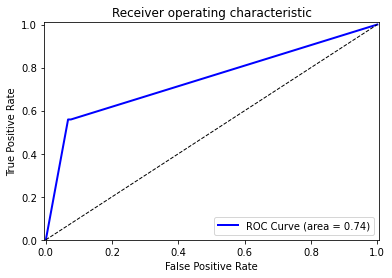

In [106]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='blue', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

In [107]:
from sklearn import metrics

cm_ANN = metrics.confusion_matrix(y_test, y_predict_ann)

print("Confusion matrix:")
print(cm_ANN)


Confusion matrix:
[[1176  823]
 [ 520 1441]]


# Decision Tree


In [108]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier(random_state=2)


dec_tree.fit(X_train, y_train)


dec_tree_predict = dec_tree.predict(X_test)


dec_tree_score = accuracy_score(y_test, dec_tree_predict)

print('Decision Tree accuracy: ' + str(dec_tree_score))

Decision Tree accuracy: 0.9555555555555556


In [109]:
from sklearn import metrics

y_predict_proba = dec_tree.predict_proba(X_test)
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, y_predict_proba[:,1], pos_label=1)
AUC_DecisionTree = metrics.auc(fpr1, tpr1)
print('Area Under the Curve: ' + str(AUC_DecisionTree))

Area Under the Curve: 0.9555999315312934


In [110]:
from sklearn.utils import resample
import statistics

predictions = []

for i in range(29):
    bootstrap_size = int(.8 * 5114) ### 5114 rows in our 'training' dataset
    bootstrapDataSetX_train = resample(X_train, n_samples = bootstrap_size , random_state=i , replace = True)
    bootstrapDataSetY_train = resample(y_train, n_samples = bootstrap_size , random_state=i , replace = True)

    Base_DecisionTree = DecisionTreeClassifier(random_state=2)
    Base_DecisionTree.fit(bootstrapDataSetX_train, bootstrapDataSetY_train)
    y_predict = Base_DecisionTree.predict(X_test)

    predictions.append(y_predict)
    


In [111]:
# Here we are printing our predictions matrix. 
# 28 rows consisting of 1705 predictions.
# The columns in the matrix are the votes on a feature from each iteration. 
# We take the majority vote on each column and create a final array of votes.

for x in range(len(predictions)):
    for y in range(len(predictions[x])):
        print(predictions[x][y], end=' ')
    print(str(x) + '#\n')

0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 

0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 

0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 

0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 

0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 1 

0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 

0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 

0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 

0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 

0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 

0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 

0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 

0 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 

0 1 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 

0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 

0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 

0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 

0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 

0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 

0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 

0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 

0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 

0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 1 

0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 

0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 

0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 

0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 

0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 

0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 

In [112]:
# a is our Transposed Predictions Matrix

a = np.array(predictions)
print(a.T)

[[0 0 0 ... 0 0 0]
 [1 1 1 ... 1 1 1]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [0 0 1 ... 1 1 0]]


In [113]:
# After transposing we have 1705 rows of predictions to be voted on. 

for x in range(len(a.T)):
    for y in range(len(a.T[x])):
        print(a.T[x][y], end=' ')
    print('  ' + str(x) + '\n')

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   0

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0   3

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0   4

0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0   5

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   6

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   7

0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0   8

1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   9

1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1   10

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   11

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1   12

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   13

0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0   14

1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   164

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1   165

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   166

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   167

0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1   168

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   169

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1   170

0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1   171

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   172

0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0   173

1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0   174

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   175

0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1   176

0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0   177

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   178

0 0 0 0 0 0 0 1 0 0 0 0 0

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   345

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   346

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   347

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   348

1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1   349

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   350

0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0   351

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   352

0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0   353

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   354

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1   355

0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0   356

1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1   357

0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   358

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   359

1 1 1 1 1 1 1 1 1 0 1 1 1

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   511

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   512

0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   513

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   514

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0   515

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   516

0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0   517

1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1   518

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   519

1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1   520

0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0   521

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   522

0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1   523

1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   524

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   525

0 0 0 0 0 0 0 0 0 0 0 0 0

1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1   668

0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1   669

1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1   670

0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0   671

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   672

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   673

1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1   674

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1   675

0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0   676

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   677

1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   678

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   679

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   680

1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1   681

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   682

0 1 1 1 1 1 1 1 1 1 1 1 1

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   830

0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0   831

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   832

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   833

1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1   834

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   835

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   836

0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0   837

0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0   838

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   839

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   840

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   841

0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0   842

0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1   843

1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0   844

0 0 0 0 0 0 0 0 0 0 0 0 0

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1002

1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1   1003

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1004

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1005

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1006

0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1007

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1   1008

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1009

0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0   1010

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1011

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1012

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1013

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1014

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1015

1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1016

0 0 0 0 0 

1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1   1163

1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1164

1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0   1165

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0   1166

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1167

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1168

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1169

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1170

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1171

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1172

1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1173

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1174

1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1175

0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0   1176

0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0   1177

1 1 1 1 1 

0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1   1328

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1329

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1330

0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1331

0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0   1332

0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1   1333

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1334

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1335

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1336

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1337

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1338

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1339

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1340

0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1   1341

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1342

0 0 0 1 1 

0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0   1488

0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1489

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1490

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1491

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1492

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1493

0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0   1494

0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1   1495

0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0   1496

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1497

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1498

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0   1499

0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1500

1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0   1501

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1502

1 1 1 1 1 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1663

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1664

1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1665

1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1   1666

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1   1667

1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1668

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1   1669

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1670

0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1   1671

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1672

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1673

0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0   1674

0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0   1675

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1676

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1677

0 0 0 0 0 

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1844

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1845

1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1846

1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1847

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0   1848

0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1849

1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0   1850

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1851

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1852

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1853

1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0   1854

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0   1855

0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   1856

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1857

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   1858

0 0 0 0 0 

0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1   2013

1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2014

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2015

1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2016

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2017

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2018

0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0   2019

1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2020

0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0   2021

1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1   2022

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2023

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2024

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2025

1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1   2026

0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0   2027

1 1 1 1 1 

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2185

1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2186

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2187

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2188

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2189

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0   2190

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2191

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2192

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1   2193

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2194

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2195

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2196

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1   2197

0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1   2198

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2199

1 1 1 1 1 

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2348

0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0   2349

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2350

0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2351

0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2352

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2353

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2354

1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2355

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2356

0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0   2357

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2358

1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2359

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2360

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2361

0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1   2362

0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2512

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2513

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2514

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2515

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2516

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2517

0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0   2518

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2519

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2520

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2521

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0   2522

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2523

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2524

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2525

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2526

0 0 0 0 0 

1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1   2680

1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2681

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2682

1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1   2683

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2684

1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1   2685

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2686

1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2687

0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0   2688

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2689

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2690

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1   2691

1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1   2692

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2693

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1   2694

1 1 1 1 1 

1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1   2861

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2862

1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1   2863

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2864

0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2865

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2866

0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0   2867

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2868

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2869

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0   2870

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2871

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   2872

1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1   2873

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   2874

1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1   2875

1 1 1 1 1 

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1   3029

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3030

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3031

1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3032

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3033

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3034

1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0   3035

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3036

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3037

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3038

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1   3039

0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3040

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3041

1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1   3042

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1   3043

1 1 1 1 1 

1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1   3194

1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3195

1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3196

1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0   3197

0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0   3198

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3199

1 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1   3200

0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0   3201

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3202

0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3203

1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1   3204

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3205

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3206

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3207

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1   3208

0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0   3351

0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0   3352

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3353

0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0   3354

0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1   3355

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3356

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1   3357

0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0   3358

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3359

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3360

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3361

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3362

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3363

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3364

1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0   3365

0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3524

1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1   3525

0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0   3526

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3527

1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0   3528

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3529

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3530

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3531

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3532

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3533

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3534

1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1   3535

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3536

0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3537

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3538

1 1 1 1 1 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3695

1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0   3696

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1   3697

0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0   3698

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3699

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3700

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3701

1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1   3702

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3703

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0   3704

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3705

0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0   3706

1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0   3707

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3708

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3709

1 1 1 1 1 

1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0   3870

1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0   3871

0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1   3872

1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1   3873

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1   3874

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3875

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3876

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3877

1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3878

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3879

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3880

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0   3881

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   3882

1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1   3883

1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1   3884

1 1 1 1 1 

In [114]:
final_arr = []
for x in range(len(a.T)):
    final_arr.append(statistics.mode(a.T[x]))

decTreeScore = accuracy_score(y_test, final_arr)
print("Accuracy using bagging with 29 base decision tree classifiers: " + str(decTreeScore))

Accuracy using bagging with 29 base decision tree classifiers: 0.9699494949494949


In [115]:
# Here we use the same bagging technique, but now we are trying to find the probability. 

predictions = []
for i in range(29):
    bootstrap_size = int(.8 * 5114) ### 150 rows in our 'training' dataset
    bootstrapDataSetX_train = resample(X_train, n_samples = bootstrap_size , random_state=i , replace = True)
    bootstrapDataSetY_train = resample(y_train, n_samples = bootstrap_size , random_state=i , replace = True)

    Base_DecisionTree = DecisionTreeClassifier(random_state=2)
    Base_DecisionTree.fit(bootstrapDataSetX_train, bootstrapDataSetY_train)
    y_predict_proba = Base_DecisionTree.predict_proba(X_test)

    predictions.append(y_predict_proba[:,1])

a = np.array(predictions)

In [116]:
final_arr = []
count = 0

# Sum the votes in each row, divide by # of columns, then append to final_arr

for x in range(len(a.T)):
    for y in range(len(a.T[x])):
        if(a.T[x][y] == 1):
            count += 1
    final_arr.append((count/29))
    count = 0
print(final_arr)

[0.0, 1.0, 0.0, 0.06896551724137931, 0.034482758620689655, 0.20689655172413793, 1.0, 1.0, 0.06896551724137931, 0.9310344827586207, 0.9310344827586207, 0.0, 0.9310344827586207, 1.0, 0.41379310344827586, 0.9310344827586207, 0.0, 0.0, 0.0, 0.034482758620689655, 0.0, 1.0, 0.896551724137931, 0.0, 0.034482758620689655, 0.0, 0.9655172413793104, 0.8275862068965517, 0.034482758620689655, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.8275862068965517, 0.6206896551724138, 0.13793103448275862, 1.0, 1.0, 0.896551724137931, 0.0, 1.0, 0.0, 0.896551724137931, 1.0, 0.0, 0.0, 0.9310344827586207, 0.0, 0.9655172413793104, 0.3103448275862069, 1.0, 0.8275862068965517, 0.7241379310344828, 0.06896551724137931, 1.0, 0.9310344827586207, 0.13793103448275862, 1.0, 0.0, 1.0, 1.0, 0.20689655172413793, 0.9655172413793104, 0.7931034482758621, 0.7586206896551724, 1.0, 1.0, 1.0, 0.10344827586206896, 1.0, 0.0, 0.3448275862068966, 0.1724137931034483, 1.0, 0.9655172413793104, 0.9655172413793104, 1.0, 0.4482758620689655, 1.0, 0.0, 0.068

In [117]:
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, final_arr, pos_label=1)
AUC_Bagging = metrics.auc(fpr2, tpr2)
print('\n\nBagging AUC: ' + str(AUC_Bagging))



Bagging AUC: 0.9931124409731639


In [118]:
results = pd.DataFrame()
results['actual'] = y_test
results['proba'] = final_arr
results[::40]

,actual,proba
6103,0,0.000000
11344,1,0.896552
12403,1,1.000000
8256,1,0.965517
10642,1,0.965517
...,...,...
8597,1,1.000000
1058,0,0.034483
5891,0,0.000000
7058,1,1.000000


In [119]:
# Here we use AdaBoost
# Then plot all AUCs generated thus far. 

In [120]:
from sklearn.ensemble import AdaBoostClassifier

my_AdaBoost = AdaBoostClassifier(n_estimators = 29,random_state=2)
my_AdaBoost.fit(X_train, y_train)
y_predict = my_AdaBoost.predict(X_test)
ada_boost_score = accuracy_score(y_test, y_predict)
print("AdaBoost Accuracy: " + str(ada_boost_score))

y_predict_proba = my_AdaBoost.predict_proba(X_test)
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_test, y_predict_proba[:,1], pos_label=1)
AUC_AdaBoost = metrics.auc(fpr3, tpr3)
print("AdaBoost AUC: " + str(AUC_AdaBoost))

AdaBoost Accuracy: 0.9297979797979798
AdaBoost AUC: 0.97848554567952


# Feature Extraction

In [121]:
# Here we are using Recursive Feature Elimination as our Feature Extraction technique
# We have nearly 100 data samples and 20% of that felt like a good number. 

from sklearn.feature_selection import RFE

rand_forest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=3)
selected_features = RFE((rand_forest), n_features_to_select=20)

selected_features.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(n_estimators=19, random_state=3),
    n_features_to_select=20)

In [122]:
# We see which features made the cut with RFE method 'get_support()'
mask = selected_features.get_support()

In [123]:
# We see the ranking of each feature
selected_features.ranking_

array([ 8,  4,  1, 40, 22, 70, 30, 21,  1,  1, 59, 23, 31,  1, 67, 47, 64,
       29,  1, 55, 18, 71, 36, 56, 58, 66, 26, 54,  3, 17, 65, 72, 51,  1,
        1,  1,  1,  1, 69,  1, 50, 63, 68, 74, 43, 19,  1, 10,  5, 62,  7,
       41,  1, 60, 45, 35, 11, 48, 27, 32, 44,  6, 33,  9, 61,  2, 20,  1,
       37, 25, 13,  1, 73,  1, 38, 52, 49, 14, 15, 16, 53, 57, 39, 28, 76,
        1, 42, 46, 34,  1,  1,  1, 12, 75, 24])

In [126]:
# We create a DF to show whether a feature was selected or not.

features = pd.DataFrame({'features': list(df.drop('Bankrupt?', axis=1)), 'selected': list(mask)})
true_features = features.loc[features['selected'] == True]
features_list = list(true_features['features'])

print(features[::2])
print('\n')
print(features_list)

                                             features  selected
0    ROA(C) before interest and depreciation befor...     False
2    ROA(B) before interest and depreciation after...      True
4                         Realized Sales Gross Margin     False
6                           Pre-tax net Interest Rate     False
8         Non-industry income and expenditure/revenue      True
10                             Operating Expense Rate     False
12                                     Cash flow rate     False
14                                       Tax rate (A)     False
16                            Net Value Per Share (A)     False
18            Persistent EPS in the Last Four Seasons      True
20                         Revenue Per Share (Yuan ¥)     False
22           Per Share Net profit before tax (Yuan ¥)     False
24                       Operating Profit Growth Rate     False
26                     Regular Net Profit Growth Rate     False
28                            Total Asse

In [128]:
select_feature_df = df[features_list]
select_feature_df

,ROA(B) before interest and depreciation after tax,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Interest-bearing debt interest rate,Persistent EPS in the Last Four Seasons,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Borrowing dependency,Average Collection Days,Allocation rate per person,Retained Earnings to Total Assets,Quick Asset Turnover Rate,Cash Turnover Rate,Net Income to Total Assets,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL)
0,0.405750,0.302646,0.780985,7.250725e-04,0.169141,0.001208,0.629951,0.021266,0.207576,0.792424,0.390284,0.003487,0.037135,0.903225,6.550000e+09,4.580000e+08,0.716845,0.827890,0.290202,0.026601
1,0.516730,0.303556,0.781506,6.470647e-04,0.208944,0.004039,0.635172,0.012502,0.171176,0.828824,0.376760,0.004917,0.012335,0.931065,7.700000e+09,2.490000e+09,0.795297,0.839969,0.283846,0.264577
2,0.472295,0.302035,0.780284,7.900790e-04,0.180581,0.005348,0.629631,0.021248,0.207516,0.792484,0.379093,0.004227,0.141016,0.909903,1.022676e-03,7.610000e+08,0.774670,0.836774,0.290189,0.026555
3,0.457733,0.303350,0.781241,4.490449e-04,0.193722,0.002896,0.630228,0.009572,0.151465,0.848535,0.379743,0.003215,0.021320,0.906902,6.050000e+09,2.030000e+09,0.739555,0.834697,0.281721,0.026697
4,0.522298,0.303475,0.781550,6.860686e-04,0.212537,0.003727,0.636055,0.005150,0.106509,0.893491,0.375025,0.004367,0.023988,0.913850,5.050000e+09,8.240000e+08,0.795016,0.839973,0.278514,0.024752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.543230,0.303510,0.781588,1.790179e-04,0.216602,0.005457,0.631415,0.006655,0.124618,0.875382,0.373823,0.009177,0.006312,0.925611,1.244230e-04,1.077940e-04,0.799927,0.840359,0.279606,0.027064
6815,0.524172,0.303520,0.781586,2.370237e-04,0.216697,0.006741,0.631489,0.004623,0.099253,0.900747,0.372505,0.009652,0.003401,0.932629,1.173396e-04,7.710000e+09,0.799748,0.840306,0.278132,0.027009
6816,0.520638,0.303512,0.781546,0.000000e+00,0.210929,0.035112,0.630612,0.001392,0.038939,0.961061,0.369637,0.004188,0.002774,0.932000,1.749713e-04,4.074263e-04,0.797778,0.840138,0.275789,0.026791
6817,0.554045,0.303498,0.781663,2.110211e-04,0.228326,0.007256,0.630731,0.003816,0.086979,0.913021,0.369649,0.008829,0.007489,0.939613,1.351937e-04,1.165392e-04,0.811808,0.841084,0.277547,0.026822


# ROC Curves: 

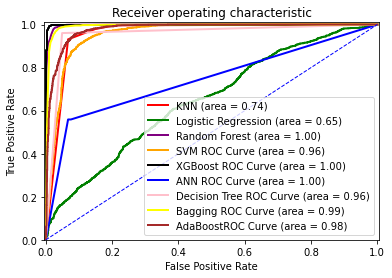

In [149]:
# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
%matplotlib inline

plt.figure()

# Roc Curve1:
plt.plot(fpr_KNN, tpr_KNN, color='red', lw=2, 
         label='KNN (area = %0.2f)' % AUC)

# Roc Curve2:
plt.plot(fpr_logistic, tpr_logistic, color='green', lw=2, 
         label='Logistic Regression (area = %0.2f)' % AUC_logistic)

# Roc Curve3:
plt.plot(fpr_random, tpr_random, color='purple', lw=2, 
         label='Random Forest (area = %0.2f)' % AUC_random)

# Roc Curve for SVM:
plt.plot(fpr_SVM, tpr_SVM, color='orange', lw=2, 
         label='SVM ROC Curve (area = %0.2f)' % AUC_SVM)
# Roc Curve for XGBoost:
plt.plot(fpr_XGBoost, tpr_XGBoost, color='black', lw=2, 
         label='XGBoost ROC Curve (area = %0.2f)' % AUC_XGBoost)
# Roc Curve for ANN:
plt.plot(fpr, tpr, color='blue', lw=2, 
         label='ANN ROC Curve (area = %0.2f)' % AUC_XGBoost)

#Decision Tree
plt.plot(fpr1, tpr1, color='pink', lw=2, label='Decision Tree ROC Curve (area = %0.2f)' % AUC_DecisionTree)
#Bagging
plt.plot(fpr2, tpr2, color='yellow', lw=2, label='Bagging ROC Curve (area = %0.2f)' % AUC_Bagging)
#AdaBoost
plt.plot(fpr3, tpr3, color='brown', lw=2, label='AdaBoostROC Curve (area = %0.2f)' % AUC_AdaBoost)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')
    
# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()